<p style="font-size:24px; color:red">CARDIOVASCULAR DISEASE DETECTOR</p>


In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as pylpot
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r"C:\Users\Abhishek\Desktop\CardioProject\Data_file - data_file.csv")

df.head()


,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


<p style="font-size:20px; color:gold">DATA CLEANING</p>

In [15]:
df.isnull().sum()

df['age'] = (df['age'] / 365).astype(int)



In [14]:
#convert categorial values into numerical values
le=LabelEncoder()
df['country']=le.fit_transform(df['country'])
df['occupation']=le.fit_transform(df['occupation'])

<p style="font-size:22px; color:green">DATA VISUALIZATION</p>

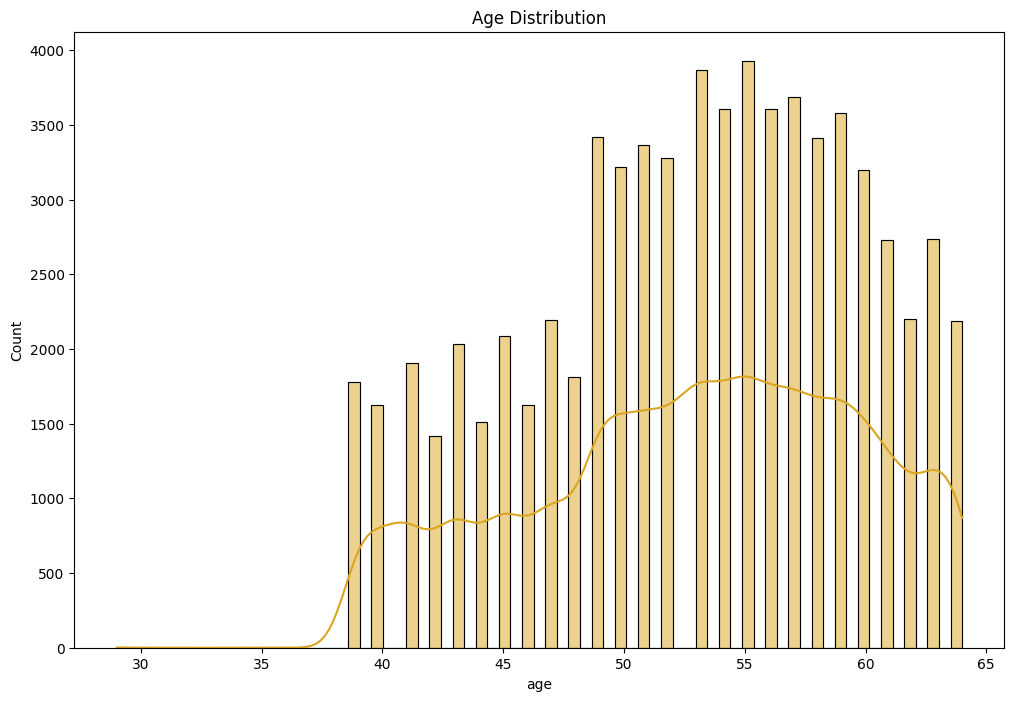

In [18]:
plt.figure(figsize=(12,8))
sns.histplot(df['age'],kde=True,color='goldenrod')
plt.title('Age Distribution')
plt.show()

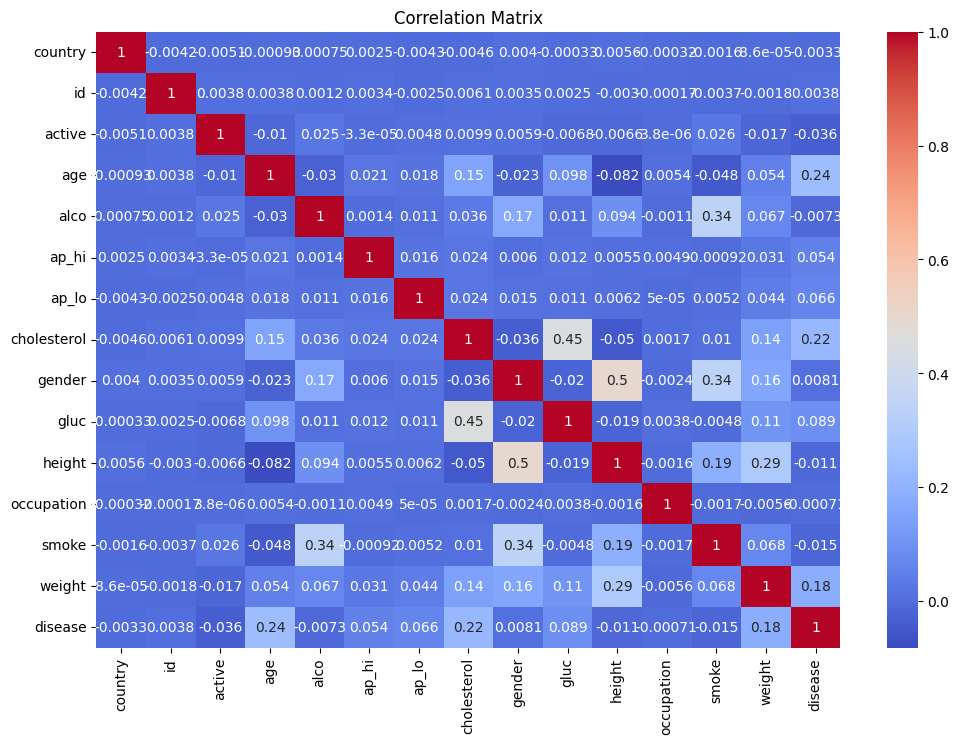

In [19]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


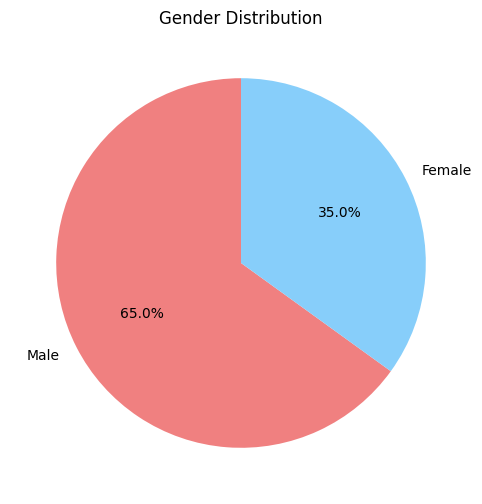

In [20]:
df['gender'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightcoral', 'lightskyblue'],
    labels=['Male', 'Female'],
    figsize=(6,6)
)
plt.title("Gender Distribution")
plt.ylabel("")  # remove y-label
plt.show()


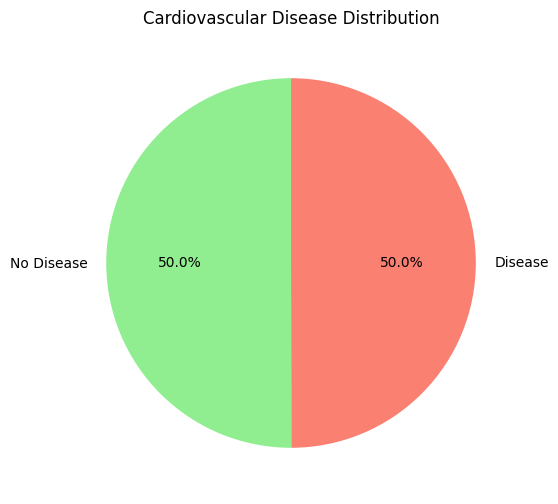

In [22]:
df['disease'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'salmon'],
    labels=['No Disease', 'Disease'],
    figsize=(6,6)
)
plt.title("Cardiovascular Disease Distribution")
plt.ylabel("")
plt.show()


<p style="font-size:22px;color:pink">MODEL BUILDING</p>

In [28]:
x = df.drop('disease', axis=1)
y = df['disease']

# Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define preprocessors
numeric_features = x.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Fit-transform
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

<p style="font-size:20px;color:gold">LOGISTIC REGRESSION</p>

In [29]:
reg=LogisticRegression(random_state=42)
reg.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [30]:
y_pred=reg.predict(x_test)

In [33]:
acc=accuracy_score(y_test,y_pred)
print(f"Logistic Regression Accuracy: {acc*100:.2f}%")


Logistic Regression Accuracy: 71.11%


<p style="font-size:22px; color:gold">DECISION TREE CLASSIFIER</p>

In [34]:
tree=DecisionTreeClassifier(random_state=42)
tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
y_pred_tree=tree.predict(x_test)

In [37]:
acc_tree=accuracy_score(y_test,y_pred_tree)
print(f"DecisionTreeClassifier Accuracy:{acc_tree*100:.2f}%")

DecisionTreeClassifier Accuracy:66.85%


<p style="font-size:22px;color:orange">MODEL EVALUATION</p>

In [43]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy : 0.7111428571428572
Precision: 0.7238986119493059
Recall   : 0.6842555618938961
F1-score : 0.7035190615835777
Confusion Matrix:
 [[5158 1830]
 [2214 4798]]


In [44]:
print("Accuracy :", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall   :", recall_score(y_test, y_pred_tree))
print("F1-score :", f1_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


Accuracy : 0.6685
Precision: 0.6722359436292314
Recall   : 0.6598687963491158
F1-score : 0.6659949622166247
Confusion Matrix:
 [[4732 2256]
 [2385 4627]]


In [1]:
# STEP 1: Create & save a production-ready model pipeline

import os, json
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import joblib



# Use raw string (r"") to avoid backslash errors in Windows paths
df = pd.read_csv(r"C:\Users\Abhishek\Desktop\CardioProject\Data_file - data_file.csv")

print("✅ Dataset loaded. Shape:", df.shape)
df.head()

# ---- A) Features/target (change if your target column name is different) ----
TARGET = "disease"
X = df.drop(columns=[TARGET])
y = df[TARGET]

# ---- B) Column types ----
num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X.select_dtypes(exclude=["number"]).columns.tolist()

# (Optional) If a numeric-looking column is actually categorical (e.g., gender 1/2), move it:
# for col in ["gender", "cholesterc", "gluc"]:
#     if col in X.columns and X[col].nunique() <= 6 and col in num_cols:
#         num_cols.remove(col)
#         cat_cols.append(col)
#         X[col] = X[col].astype(str)

# ---- C) Train/test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---- D) Preprocessing + model pipeline ----
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ],
    remainder="drop",
)

model = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("clf", LogisticRegression(max_iter=1000)),
    ]
)

# ---- E) Fit ----
model.fit(X_train, y_train)

# ---- F) Save pipeline + schema ----
joblib.dump(model, "model.joblib")
feature_order = list(X.columns)

schema = {
    "columns": X.columns.tolist(),
    "num_cols": num_cols,
    "cat_cols": cat_cols
}
with open("feature_order.json", "w") as f:
    json.dump(schema, f, indent=2)

print("✅ Saved:", os.path.abspath("model.joblib"))
print("✅ Saved:", os.path.abspath("feature_order.json"))



# Save model inside backend folder
joblib.dump(model, r"C:\Users\Abhishek\Desktop\HeartDiseaseApp\backend\model.joblib")

# Save feature order inside backend folder
with open(r"C:\Users\Abhishek\Desktop\HeartDiseaseApp\backend\feature_order.json", "w") as f:
    json.dump(feature_order, f)

   

joblib.dump(model, r"C:\Users\Abhishek\Desktop\HeartDiseaseApp\backend\heart_model.pkl")




✅ Dataset loaded. Shape: (70000, 16)
✅ Saved: c:\Users\Abhishek\Desktop\CardioProject\model.joblib
✅ Saved: c:\Users\Abhishek\Desktop\CardioProject\feature_order.json


['C:\\Users\\Abhishek\\Desktop\\HeartDiseaseApp\\backend\\heart_model.pkl']

NameError: name 'model' is not defined